# Perturbation Space

pertpy introduces a novel conceptual framework that distinctly delineates between two fundamental domains: the "cell space" and the "perturbation space".
In this paradigm, the cell space encapsulates configurations where discrete data points inherently represent individual cells.
A prevalent manifestation of this pattern can be observed through prominent visualization techniques such as UMAP embeddings as commonly observed in publications.
Conversely, the perturbation space departs from the individualistic perspective of cells and instead organizes cells into cohesive ensembles that have undergone similar perturbations. These grouped cells are subsequently embedded to faithfully encapsulate the nature of the perturbation itself.
This specialized space enables comprehending the collective impact of perturbations on cells.

pertpy offers [several distinct ways](https://pertpy.readthedocs.io/en/latest/usage/usage.html#perturbation-space) of determining the perturbation space that will be introduced in this tutorial. We differentiate between perturbation spaces (where we create one datapoint for all cells of one perturbation) and cluster spaces (where we cluster all cells and then test how well the clustering overlaps with the perturbations).

We will be working with the pre-processed Norman dataset (counts are already normalized), which encompases a pooled CRISPR screening experiment comparing the transcriptional effects of overexpressing genes alone or in combination.

Reference: Norman, Thomas M et al. “Exploring genetic interaction manifolds constructed from rich single-cell phenotypes.” Science (New York, N.Y.) vol. 365,6455 (2019): 786-793. doi:10.1126/science.aax4438

## Setup

In [3]:
import pertpy as pt
import scanpy as sc

In [4]:
adata = pt.dt.norman_2019()
adata

AnnData object with n_obs × n_vars = 111255 × 19018
    obs: 'guide_identity', 'read_count', 'UMI_count', 'coverage', 'gemgroup', 'good_coverage', 'number_of_cells', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', '

In [5]:
adata.obs

,guide_identity,read_count,UMI_count,coverage,gemgroup,good_coverage,number_of_cells,guide_AHR,guide_ARID1A,guide_ARRDC3,...,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,leiden,perturbation_name,perturbation_type,perturbation_value,perturbation_unit
index,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGAAGC-1,NegCtrl0_NegCtrl0__NegCtrl0_NegCtrl0,1252,67,18.686567,1,True,2,0,0,0,...,4108,4108,19413.0,1327.0,6.835625,10,control,genetic,NaN,NaN
AAACCTGAGGCATGTG-1,TSC22D1_NegCtrl0__TSC22D1_NegCtrl0,2151,104,20.682692,1,True,1,0,0,0,...,3142,3142,13474.0,962.0,7.139676,3,TSC22D1,genetic,NaN,NaN
AAACCTGAGGCCCTTG-1,KLF1_MAP2K6__KLF1_MAP2K6,1037,59,17.576271,1,True,1,0,0,0,...,4229,4229,23228.0,1548.0,6.664371,7,KLF1+MAP2K6,genetic,NaN,NaN
AAACCTGCACGAAGCA-1,NegCtrl10_NegCtrl0__NegCtrl10_NegCtrl0,958,39,24.564103,1,True,1,0,0,0,...,2114,2114,6842.0,523.0,7.643963,2,control,genetic,NaN,NaN
AAACCTGCAGACGTAG-1,CEBPE_RUNX1T1__CEBPE_RUNX1T1,244,14,17.428571,1,True,1,0,0,0,...,2753,2753,9130.0,893.0,9.780942,10,CEBPE+RUNX1T1,genetic,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTCATCAGTACGT-8,FOXA3_NegCtrl0__FOXA3_NegCtrl0,2068,95,21.768421,8,True,1,0,0,0,...,3305,3305,14727.0,898.0,6.097644,3,FOXA3,genetic,NaN,NaN
TTTGTCATCCACTCCA-8,CELF2_NegCtrl0__CELF2_NegCtrl0,829,33,25.121212,8,True,1,0,0,0,...,2842,2842,9750.0,566.0,5.805128,10,CELF2,genetic,NaN,NaN
TTTGTCATCCCAACGG-8,BCORL1_NegCtrl0__BCORL1_NegCtrl0,136,9,15.111111,8,True,1,0,0,0,...,2824,2824,8670.0,490.0,5.651672,4,BCORL1,genetic,NaN,NaN


The Norman dataset has annotations for gene programmes for many perturbations, which we will use later to evaluate the perturbation spaces. These gene programmes can be obtained from the Norman paper:

In [6]:
G1_CYCLE = [
    'CDKN1A', {'CDKN1B', 'CDKN1A'}, 'CDKN1B', {'CDKN1C', 'CDKN1A'}, {'CDKN1C', 'CDKN1B'}, 'CDKN1C'
]

ERYTHROID = [
    {'CBL', 'CNN1'}, {'CBL', 'PTPN12'}, {'CBL', 'PTPN9'}, {'CBL', 'UBASH3B'}, {'SAMD1', 'PTPN12'},
    {'SAMD1', 'UBASH3B'}, {'UBASH3B', 'CNN1'}, {'UBASH3B', 'PTPN12'}, {'UBASH3B', 'PTPN9'}, {'UBASH3B', 'UBASH3A'},
    {'UBASH3B', 'ZBTB25'}, {'BPGM', 'SAMD1'}, 'PTPN1', {'PTPN12', 'PTPN9'}, {'PTPN12', 'UBASH3A'}, {'PTPN12', 'ZBTB25'},
    {'UBASH3A', 'CNN1'}
]

PIONEER_FACTORS = [
    {'FOXA1', 'FOXF1'}, {'FOXA1', 'FOXL2'}, {'FOXA1', 'HOXB9'}, {'FOXA3', 'FOXA1'}, {'FOXA3', 'FOXF1'},
    {'FOXA3', 'FOXL2'}, {'FOXA3', 'HOXB9'}, 'FOXA3', {'FOXF1', 'FOXL2'}, {'FOXF1', 'HOXB9'}, {'FOXL2', 'MEIS1'},
    'HOXA13',
    'HOXC13', {'POU3F2', 'FOXL2'}, 'TP73', 'MIDN', {'LYL1', 'IER5L'}, 'HOXC13', {'DUSP9', 'SNAI1'}, {'ZBTB10', 'SNAI1'}
]

GRANULOCYTE_APOPTOSIS = [
    'SPI1', 'CEBPA', {'CEBPB', 'CEBPA'}, 'CEBPB', {'CEBPE', 'CEBPA'}, {'CEBPE', 'CEBPB'}, {'CEBPE', 'RUNX1T1'},
    {'CEBPE', 'SPI1'}, 'CEBPE', {'ETS2', 'CEBPE'}, {'KLF1', 'CEBPA'}, {'FOSB', 'CEBPB'}, {'FOSB', 'CEBPE'},
    {'ZC3HAV1', 'CEBPA'}, {'JUN', 'CEBPA'}
]

PRO_GROWTH = [
    {'CEBPE', 'KLF1'}, 'KLF1', {'KLF1', 'BAK1'}, {'KLF1', 'MAP2K6'}, {'KLF1', 'TGFBR2'}, 'ELMSAN1',
    {'MAP2K3', 'SLC38A2'}, {'MAP2K3', 'ELMSAN1'}, 'MAP2K3', {'MAP2K3', 'MAP2K6'}, {'MAP2K6', 'ELMSAN1'}, 'MAP2K6',
    {'MAP2K6', 'KLF1'}
]

MEGAKARYOCYTE = [
    {'MAPK1', 'TGFBR2'}, 'MAPK1', {'ETS2', 'MAPK1'}, 'ETS2', {'CEBPB', 'MAPK1'}
]

programmes = {
    'G1 cell cycle': G1_CYCLE,
    'Erythroid': ERYTHROID,
    'Pioneer factors': PIONEER_FACTORS,
    'Granulocyte apoptosis': GRANULOCYTE_APOPTOSIS,
    'Pro-growth': PRO_GROWTH,
    'Megakaryocyte': MEGAKARYOCYTE
}

Now we will save the gene programmes in our AnnData object as an additional '.obs' columns:

In [7]:
gene_programme = []

for target_pert in adata.obs['perturbation_name']:
    if target_pert == 'control':
        gene_programme.append('Control')
        continue

    determined = False
    for programme, pert_list in programmes.items():
        for pert in pert_list:
            if (type(pert) == set and pert == set(target_pert.split('+'))) or (target_pert == pert):
                gene_programme.append(programme)
                determined = True
                break
                
    if not determined:
        gene_programme.append('Unknown')

adata.obs['gene_programme'] = gene_programme

We will work only with the perturbations that have a defined gene programme, since we want to evaluate the perturbation spaces afterward.

In [8]:
adata = adata[adata.obs['gene_programme'] != 'Unknown']

## Embed data in Perturbation Spaces
### Pseudobulk Space

The Pseudobulk space returns an Anndata in which each observation corresponds to the pseudobulk expression of all cells of the respective perturbation.

In [9]:
ps = pt.tl.PseudobulkSpace()
psadata = ps.compute(adata, target_col="perturbation_name", groups_col="perturbation_name", mode="mean", min_cells=0,
                     min_counts=0)

In [10]:
psadata

AnnData object with n_obs × n_vars = 75 × 19017
    obs: 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'guide_KLF1', 'guide_KMT2A', 'guide_LHX1', 'guide_LYL1', 'guide_MAML2', 'guide_MAP2K3', 'guide_MAP2K6', 'guide

In [11]:
psadata.obs.head()

,guide_AHR,guide_ARID1A,guide_ARRDC3,guide_ATL1,guide_BAK1,guide_BCL2L11,guide_BCORL1,guide_BPGM,guide_C19orf26,guide_C3orf72,...,guide_ZC3HAV1,guide_ZNF318,guide_ids,perturbation_name,perturbation_type,perturbation_value,perturbation_unit,gene_programme,psbulk_n_cells,psbulk_counts
BAK1+KLF1,0,0,0,0,1,0,0,0,0,0,...,0,0,"BAK1,KLF1",BAK1+KLF1,genetic,NaN,NaN,Pro-growth,392.0,1.186428e+06
BPGM+SAMD1,0,0,0,0,0,0,0,1,0,0,...,0,0,"BPGM,SAMD1",BPGM+SAMD1,genetic,NaN,NaN,Erythroid,300.0,8.491724e+05
CBL+CNN1,0,0,0,0,0,0,0,0,0,0,...,0,0,"CBL,CNN1",CBL+CNN1,genetic,NaN,NaN,Erythroid,348.0,9.622422e+05
CBL+PTPN12,0,0,0,0,0,0,0,0,0,0,...,0,0,"CBL,PTPN12",CBL+PTPN12,genetic,NaN,NaN,Erythroid,333.0,9.529553e+05
CBL+PTPN9,0,0,0,0,0,0,0,0,0,0,...,0,0,"CBL,PTPN9",CBL+PTPN9,genetic,NaN,NaN,Erythroid,305.0,8.501961e+05


In the generated AnnData, each observation represents a perturbation, and its expression is the `mode` of the PseudobulkSpace function.

Now, the perturbation space can be visualized, and various operations can be applied to analyze it.

In [12]:
psadata.obs.perturbation_name = psadata.obs.perturbation_name.astype('category')

         Falling back to preprocessing with `sc.pp.pca` and default params.


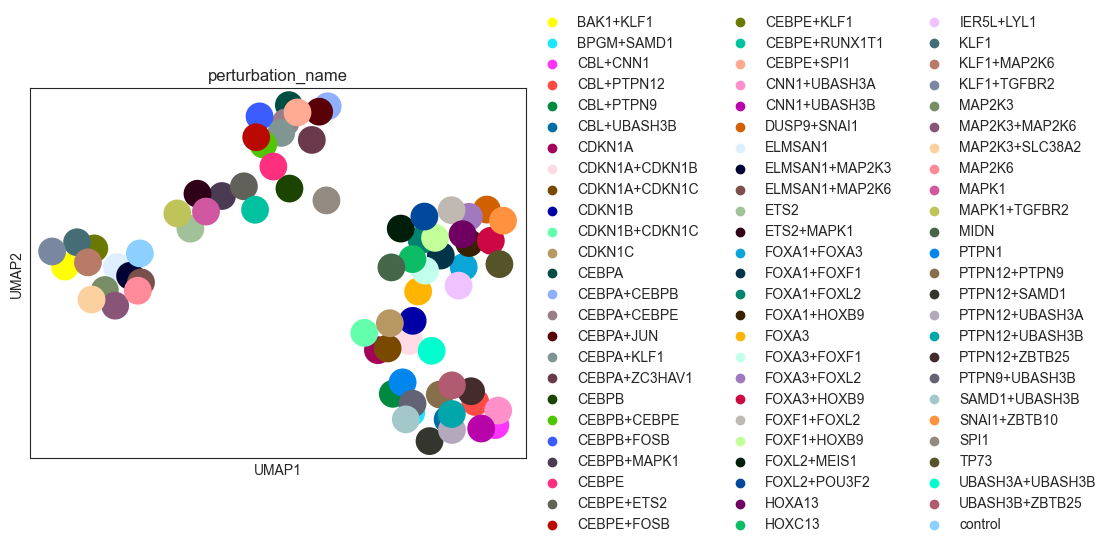

In [13]:
sc.pp.neighbors(psadata)
sc.tl.umap(psadata)
sc.pl.umap(psadata, color='perturbation_name')

Based on the UMAP visualization of the perturbation space above, we see that the individual perturbations are grouped into clusters. Next, we want to check if the clusters correspond to the gene programmes that we have defined for the individual perturbations above.

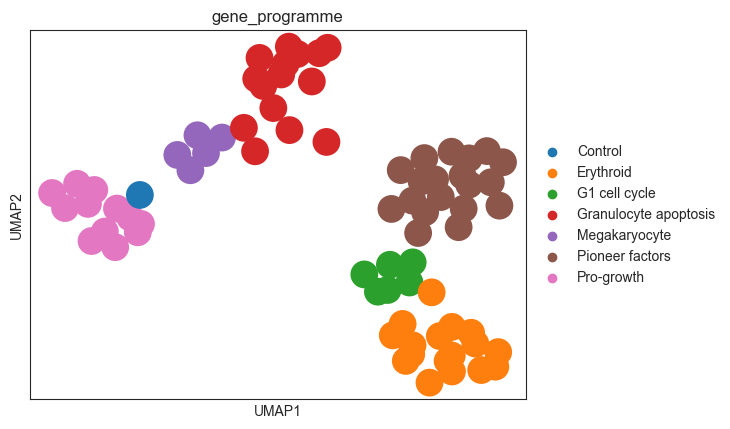

In [14]:
sc.pl.umap(psadata, color='gene_programme')

When coloring the individual perturbations according to their gene programs, we observe that the clusters align with the gene programs. This indicates that the perturbation space nicely captures the effects of the perturbations on the cells. Furthermore, when looking at the control perturbation (in the UMAP plot above depicted in blue), we see that it is situated on the periphery of the 'pro-growth' cluster, suggesting that the perturbations in this cluster might have only a small effect on the cells.

Another option is to calculate the difference between the perturbations and the control, using the `compute_control_diff` method. Afterward, we can again calculate and visualize the perturbation space:

In [15]:
ps = pt.tl.PseudobulkSpace()
sc.pp.neighbors(adata)
sc.tl.pca(adata)

In [16]:
diff_adata = ps.compute_control_diff(adata, target_col='perturbation_name', reference_key='control', embedding_key='X_pca')

In [17]:
diff_psadata = ps.compute(diff_adata, target_col="perturbation_name", groups_col="perturbation_name", mode="mean", min_cells=0, min_counts=0, embedding_key='X_pca', skip_checks=True)

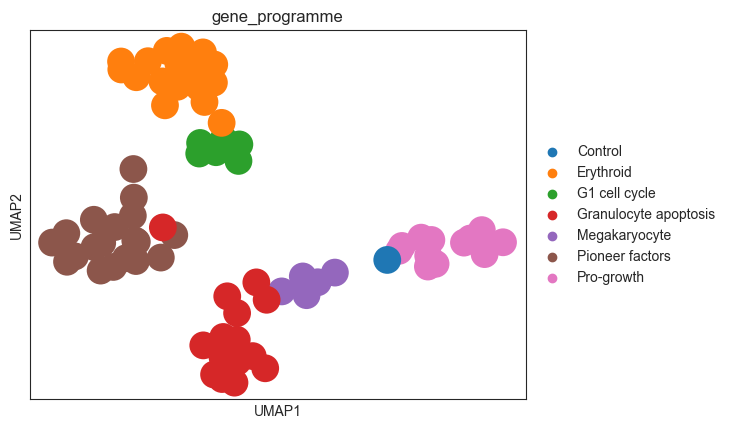

In [18]:
diff_psadata.obs.perturbation_name = diff_psadata.obs.perturbation_name.astype('category')

sc.pp.neighbors(diff_psadata)
sc.tl.umap(diff_psadata)
sc.pl.umap(diff_psadata, color='gene_programme')

As the individual perturbations already clustered nicely before the control difference was calculated, we do not see a big difference in the UMAP plot in terms of the clustering. We can see that the perturbations with the same gene programme cluster even a bit more densely than before. We also note one "Granulocyte apoptosis" perturbation that is situated in the "Pioneer factors" cluster, which could be worth investigating further.

### Discriminator Classifier

The Discriminator Classifier embedding method trains a NN classifier to predict which perturbation has been applied to each cell. Once the training has finished, we obtain the representations of the last layer as embedding of the perturbations.

In [9]:
ps = pt.tl.DiscriminatorClassifierSpace()

The `load` method creates the model to train and the dataloaders. It accepts different hyperparameters related with the architecture of the model such as `hidden_dim`, `dropout`, `batch_norm`, etc. 
Training hyperparameters such as `batch_size`, `test_split_size`, `validation_split_size` can also be changed.

In [10]:
classifier_ps = ps.load(adata, target_col="perturbation_name", hidden_dim=[512, 256], dropout=0.05, batch_size=64, batch_norm=True)

Let's train just for a few epochs to show the general idea. The trainer uses GPU if available.

In [11]:
classifier_ps.train(max_epochs=20)

GPU available: True (mps), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name | Type | Params
------------------------------
0 | net  | MLP  | 9.9 M 
------------------------------
9.9 M     Trainable params
0         Non-trainable params
9.9 M     Total params
39.553    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=20` reached.


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │     2.326035976409912     │
└───────────────────────────┴───────────────────────────┘

Next, we will extract the embeddings of the data from the trained models. The embeddings are the representation of each cell in the last layer of the model, which has a size of 256, as previously set. Hence, the embeddings represent a lower dimensional representation of the data.

In [12]:
pert_embeddings = classifier_ps.get_embeddings()

In [14]:
pert_embeddings.shape

(40763, 256)

The pert_embeddings object is of size (n_cells, 256). We can further analyze and visualize this space, by applying pseudobulk or any other transformation to obtain one datapoint per perturbation (an AnnData with shape n_perturbations x 256).

In [15]:
ps = pt.tl.PseudobulkSpace()
psadata = ps.compute(pert_embeddings, target_col="perturbations", groups_col="perturbations", mode="mean", min_cells=0, min_counts=0)

In [16]:
psadata

AnnData object with n_obs × n_vars = 75 × 256
    obs: 'perturbations', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'guide_KLF1', 'guide_KMT2A', 'guide_LHX1', 'guide_LYL1', 'guide_MAML2', 'guide_MAP2K3', 'guide_

In [17]:
psadata.obs.perturbations = psadata.obs.perturbations.astype('category')

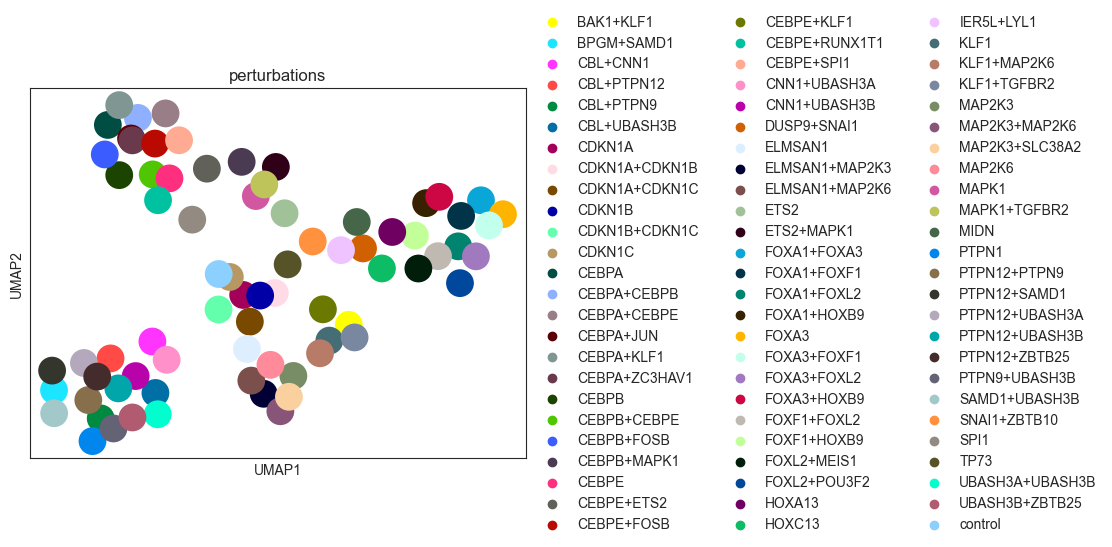

In [18]:
sc.pp.neighbors(psadata, use_rep='X')
sc.tl.umap(psadata)
sc.pl.umap(psadata, color='perturbations')

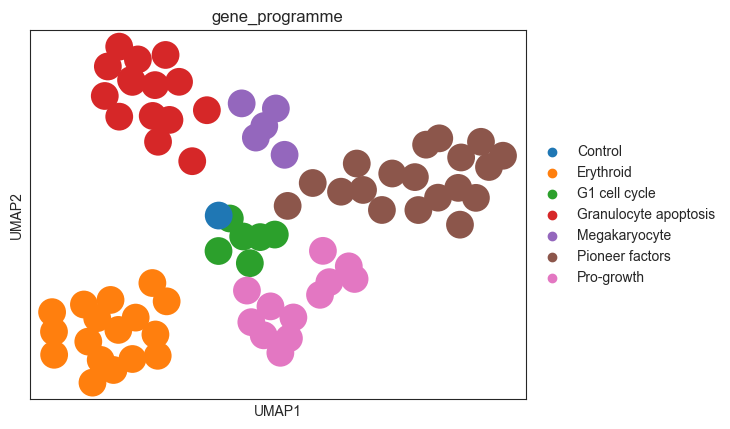

In [19]:
sc.pl.umap(psadata, color='gene_programme')

As we see based on the UMAP plot above, the perturbations are grouped into clusters that correspond to the gene programmes. Importantly, the classifier was not trained to separate the gene programmes, but the individual perturbations. Hence, the fact that the gene programmes are nicely separated in the embedding space indicates that the Discriminator Classifier works well, as the embeddings capture the effects of the perturbations on the cells.

Lastly, we can drop the one-hot encoded perturbations from the original AnnData object, as we are done with the training and the embeddings have been extracted.

In [23]:
adata.obs = adata.obs.drop("encoded_perturbations", axis=1)

### Centroid Space

The Centroid Space computes the centroids per perturbation of a pre-computed embedding. Hence, we first need to compute an embedding for the original dataset; here we use UMAP. Note that in this particular dataset, the UMAP is already computed. Nevertheless, we will compute it again to show how to use the Centroid Space in a general setting.

In [19]:
sc.tl.pca(adata)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

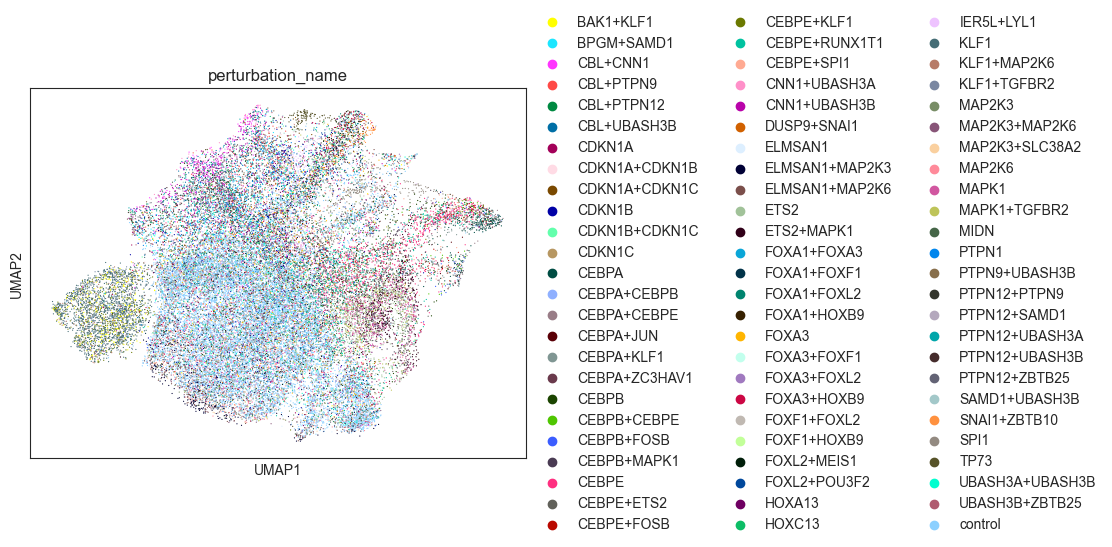

In [20]:
sc.pl.umap(adata, color="perturbation_name")

In [21]:
ps = pt.tl.CentroidSpace()
psadata = ps.compute(adata, target_col="perturbation_name", embedding_key="X_umap")

In [22]:
psadata

AnnData object with n_obs × n_vars = 75 × 2
    obs: 'perturbation_name', 'guide_AHR', 'guide_ARID1A', 'guide_ARRDC3', 'guide_ATL1', 'guide_BAK1', 'guide_BCL2L11', 'guide_BCORL1', 'guide_BPGM', 'guide_C19orf26', 'guide_C3orf72', 'guide_CBFA2T3', 'guide_CBL', 'guide_CDKN1A', 'guide_CDKN1B', 'guide_CDKN1C', 'guide_CEBPA', 'guide_CEBPB', 'guide_CEBPE', 'guide_CELF2', 'guide_CITED1', 'guide_CKS1B', 'guide_CLDN6', 'guide_CNN1', 'guide_CNNM4', 'guide_COL1A1', 'guide_COL2A1', 'guide_CSRNP1', 'guide_DLX2', 'guide_DUSP9', 'guide_EGR1', 'guide_ELMSAN1', 'guide_ETS2', 'guide_FEV', 'guide_FOSB', 'guide_FOXA1', 'guide_FOXA3', 'guide_FOXF1', 'guide_FOXL2', 'guide_FOXO4', 'guide_GLB1L2', 'guide_HES7', 'guide_HK2', 'guide_HNF4A', 'guide_HOXA13', 'guide_HOXB9', 'guide_HOXC13', 'guide_IER5L', 'guide_IGDCC3', 'guide_IKZF3', 'guide_IRF1', 'guide_ISL2', 'guide_JUN', 'guide_KIAA1804', 'guide_KIF18B', 'guide_KIF2C', 'guide_KLF1', 'guide_KMT2A', 'guide_LHX1', 'guide_LYL1', 'guide_MAML2', 'guide_MAP2K3', 'guid

In [23]:
psadata.obs.perturbation_name = psadata.obs.perturbation_name.astype('category')

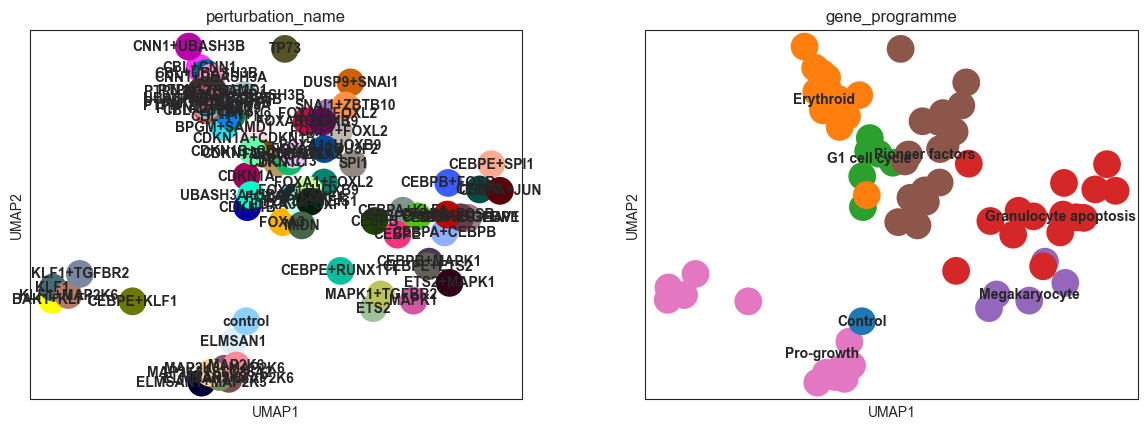

In [24]:
sc.pl.umap(psadata, color=["perturbation_name", "gene_programme"], legend_loc='on data')

Based on the UMAP plots above, we see that also the Centroid Space is capable of capturing the effects of the perturbations on the cells. The clusters align with the gene programmes, and the control perturbation is situated on the periphery of the 'Pro-growth' cluster.

## Cluster Spaces
### DBScan Space

DBSCAN clusters the given data using a density-based algorithm. Internally, pertpy uses the sklearn's implementation of DBSCAN, hence it is possible to pass any parameter accepted by sklearn's implementation. The most important parameters are `eps` and `min_samples`, which need to be tuned in accordance with the specific data.

You can cluster the data based on the full expression profile stored in .X or on a data representation with reduced dimensionality as specified by the `embedding_key` parameter. Be aware that computing the embedding on the .X matrix can be very time consuming for large datasets. In this tutorial, we will use the UMAP embedding, which was already calculated above but will be calculated again in the next cell for the purpose of completeness.

In [25]:
sc.tl.pca(adata, n_comps=15)
sc.pp.neighbors(adata)
sc.tl.umap(adata)

In [26]:
ps = pt.tl.DBSCANSpace()

In [27]:
dbscan_psadata = ps.compute(adata, min_samples=50, eps=0.25, copy=True, embedding_key="X_umap", n_jobs=2)

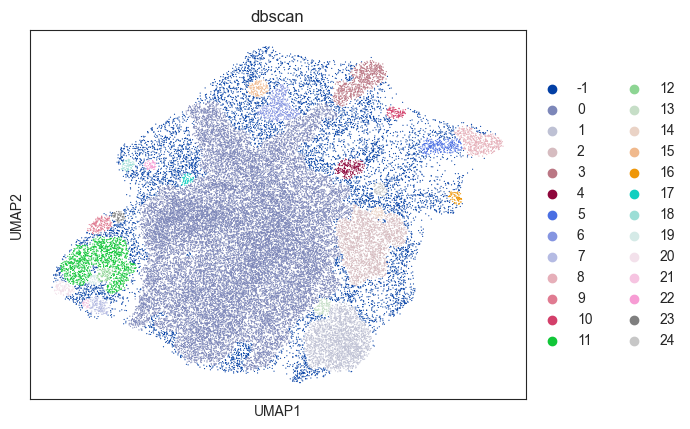

In [28]:
dbscan_psadata.obs.dbscan = dbscan_psadata.obs.dbscan.astype('category')
sc.pl.umap(dbscan_psadata, color="dbscan")

The UMAP plot above shows that several clusters have been identified based on density-based clustering. Of note, one could achieve a finer clustering using the whole data (adata.X) or a different embedding, which we omit here for the sake of simplicity.

Next, we want to evaluate if the identified clusters correspond to the gene programmes that we have defined for the individual perturbations above. Note that the `true_label_col` specifying the ground truth annotation in the `evaluate_clustering` method could also be something different from gene programs, or even the perturbation itself. As evaluation metics, we will calculate the NMI and ARI between the clusters and the gene programmes. Additionally, ASW can be calculated as well but, depending on the size of the dataset, it can take longer to compute.

In [29]:
dbscan_results = ps.evaluate_clustering(dbscan_psadata, true_label_col="gene_programme", cluster_col="dbscan",
                                        metric="l1", metrics=['nmi', 'ari'])  #asw takes ages to compute

In [30]:
dbscan_results

{'nmi': 0.17569832707103, 'ari': 0.0918081441614236}

### K-Means Space

Analogous to the steps used for DBSCAN clustering, we will now use K-means algorithm to cluster the data. This time, we will use the PCA embedding, which we calculated above. Internally, pertpy uses sklearn's implementation of K-means, hence it is possible to pass any parameter accepted by sklearn's implementation.

In [33]:
ps = pt.tl.KMeansSpace()
kmeans_psadata = ps.compute(adata, n_clusters=7, copy=True, embedding_key="X_pca")

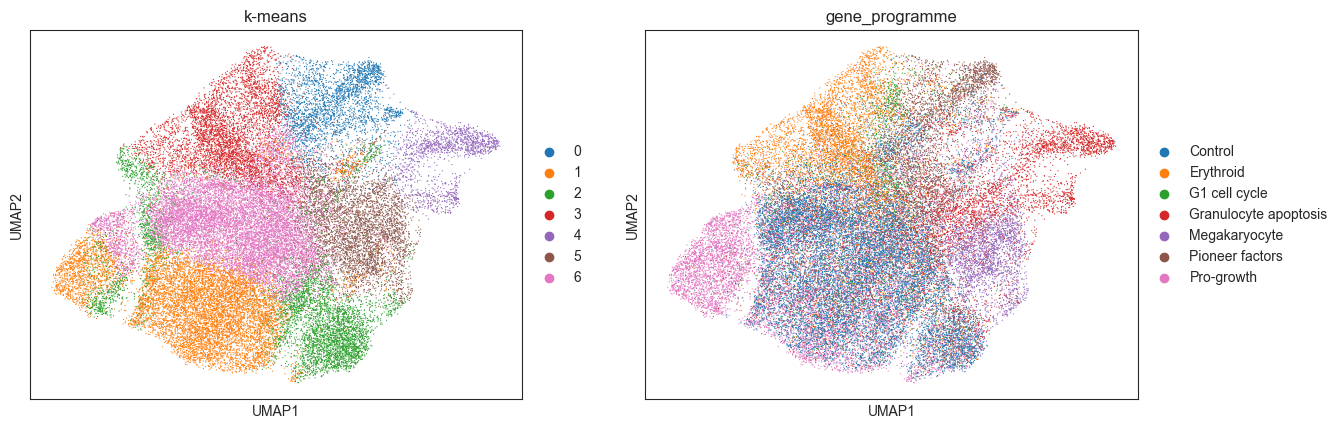

In [34]:
kmeans_psadata.obs['k-means'] = kmeans_psadata.obs['k-means'].astype('category')
sc.pl.umap(kmeans_psadata, color=["k-means", "gene_programme"])

Again, we will evaluate the calculated clusters using the NMI and ARI metrics:

In [35]:
kmeans_results = ps.evaluate_clustering(kmeans_psadata, true_label_col="gene_programme", cluster_col="k-means",
                                        metric="l2", metrics=['nmi', 'ari'])

In [36]:
kmeans_results

{'nmi': 0.22118522241390073, 'ari': 0.15420778229072798}

## Perturbation arithmetics

Pertpy provides methods to perform arithmetic operations on perturbations. For instance, we can add two perturbations together to create a new perturbation. In the dataset investigated in this tutorial, we already have combined perturbations, hence we will use the experimental data to validate the calculated combined effect. In the following, we will arithmetically combine the perturbations `CEBPE` and `KLF1` to create a new perturbation `CEBPE+KLF1`.

In [37]:
ps = pt.tl.PseudobulkSpace()
psadata = ps.compute(adata, target_col="perturbation_name", groups_col="perturbation_name", mode="mean", min_cells=0, min_counts=0)

We rename the 'CEBPE+KLF1' perturbation to 'CEBPE+KLF1_Ground_Truth' to avoid confusion with the newly created perturbation.

In [38]:
psadata.obs_names = [obs if obs != 'CEBPE+KLF1' else 'CEBPE+KLF1_Ground_Truth' for obs in psadata.obs_names]
psadata.obs['perturbation_name'] = psadata.obs_names

Let's add the two perturbations together. Here, we run the `add` method with the `ensure_consistency` parameter set to `False`.

In [39]:
new_perturbation = ps.add(psadata, perturbations=["CEBPE", "KLF1"], reference_key='control', target_col='perturbation_name')
new_perturbation.obs['perturbation_name'] = new_perturbation.obs_names.astype('category')

Operation might be done in non-consistent space (perturbation - perturbation != control). 
Subtract control perturbation needed for consistency of space in all data representations. 
Run with ensure_consistency=True

Finally, we can visualize the perturbation space with the newly calculated perturbation:

         Falling back to preprocessing with `sc.pp.pca` and default params.


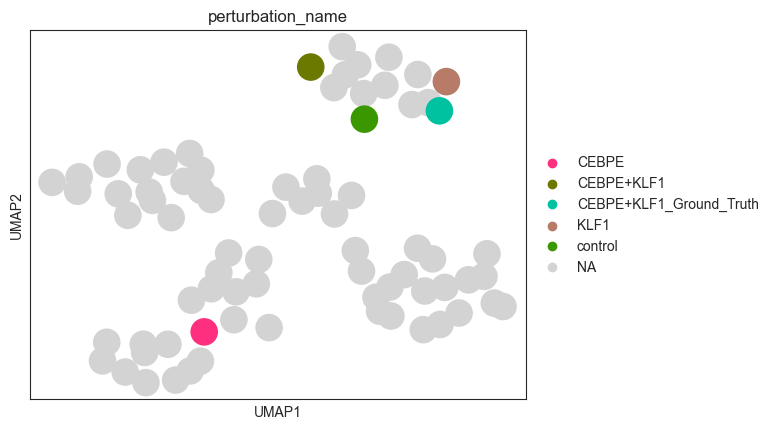

In [40]:
sc.pp.neighbors(new_perturbation)
sc.tl.umap(new_perturbation)
sc.pl.umap(new_perturbation, color='perturbation_name',
           groups=['CEBPE+KLF1_Ground_Truth', 'CEBPE+KLF1', 'CEBPE', 'KLF1', 'control'])